In [78]:
# Rupaul data analysis
# What percent of queens win more based on type, and what states have the best average placement?

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Queens.csv')

df

,Queen,Season,Type,State,Placement
0,BeBe Zahara Benet,1,Performance,Minnesota,1st
1,Nina Flowers,1,Fashion,Colorado,2nd
2,Rebecca Glasscock,1,Pageant,Florida,3rd
3,Shannel,1,Pageant,California,4th
4,Ongina,1,Performance,California,5th
...,...,...,...,...,...
177,Jasmine Kennedie,14,Comedy,New York,10th
178,June Jambalaya,14,Comedy,California,12th
179,Alyssa Hunter,14,Comedy,Puerto Rico,13th
180,"Kornbread ""The Snack"" JetÃ©",14,Comedy,California,14th


In [13]:
winners = df[df['Placement'] == '1st']

state_winner_counts = winners['State'].value_counts()
top_states = state_winner_counts.nlargest(5)  # Get top 5 states

winners
print(top_states)

State
Colorado        2
New York        2
Minnesota       1
Florida         1
Pennsylvania    1
Name: count, dtype: int64


In [19]:
# Filter for winners
winners_df = df[df['Placement'] == '1st']

# Group winners by state and get a list of winning queens
winners_by_state = winners_df.groupby('State')['Queen'].apply(list) 

print(winners_by_state)

State
Arkansas                             [Symone]
California                             [Raja]
Colorado            [Yvie Oddly, Willow Pill]
Florida                        [Tyra Sanchez]
Georgia                      [Violet Chachki]
Illinois                       [Sasha Velour]
Louisiana                    [Bianca Del Rio]
Minnesota                 [BeBe Zahara Benet]
New York        [Bob the Drag Queen, Aquaria]
Pennsylvania                 [Sharon Needles]
Washington                    [Jinkx Monsoon]
Wisconsin                [Jaida Essence Hall]
Name: Queen, dtype: object


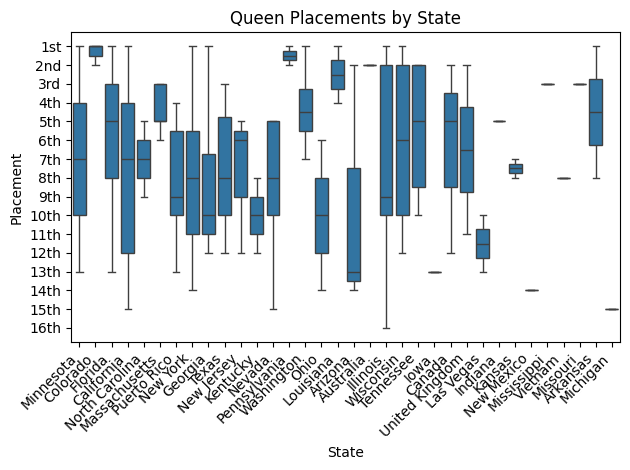

In [77]:
import seaborn as sns

sns.boxplot(x='State', y='Placement', data=df)

# Customize the plot
plt.xlabel("State")
plt.ylabel("Placement")
plt.title("Queen Placements by State")

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

plt.show()

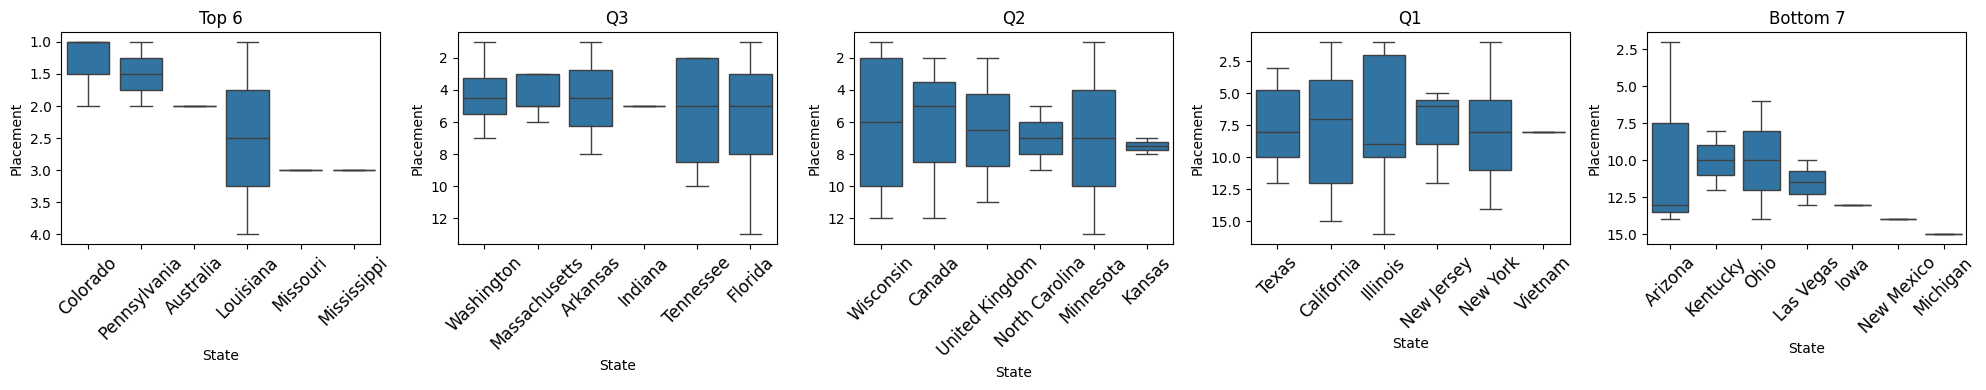

In [76]:
def load_and_preprocess_data(filename):
  df = pd.read_csv(filename)

  # Map placements to numerical values 
  placement_map = {
      "1st": 1,
      "2nd": 2,
      "3rd": 3,
      "4th": 4,
      "5th": 5,
      "6th": 6,
      "7th": 7,
      "8th": 8,
      "9th": 9,
      "10th": 10,
      "11th": 11,
      "12th": 12,
      "13th": 13,
      "14th": 14,
      "15th": 15,
      "16th": 16
  }
  df['Placement_Num'] = df['Placement'].map(placement_map)

  return df

def create_boxplots_by_performance(df):
  """
  Creates 5 boxplots for states grouped by performance quartiles.
  """

  # Calculate average placement per state
  state_averages = df.groupby('State')['Placement_Num'].mean().sort_values()

  # Divide states into 5 groups based on average placement
  num_states = len(state_averages)
  group_size = num_states // 5  # Integer division for equal group sizes

  # Create groups of states
  groups = [
      state_averages.index[:group_size],  # Top 6 states (highest average placement)
      state_averages.index[group_size:group_size*2],
      state_averages.index[group_size*2:group_size*3],
      state_averages.index[group_size*3:group_size*4],
      state_averages.index[group_size*4:]  # Bottom 7 states (lowest average placement)
  ]

  # Adjust the last group to include the 7 worst states
  groups[-1] = groups[-1][-7:]

  # Create subplots and boxplots for each group
  fig, axes = plt.subplots(1, 5, figsize=(20, 4))  # Adjust figure size for better readability
  group_labels = ["Top 6", "Q3", "Q2", "Q1", "Bottom 7"]

  for i, group in enumerate(groups):
      group_df = df[df['State'].isin(group)]  # Filter DataFrame for states in the current group
      sns.boxplot(x='State', y='Placement_Num', data=group_df, ax=axes[i], order=group) 
      axes[i].set_title(group_labels[i])
      axes[i].set_xlabel("State")
      axes[i].set_ylabel("Placement") 
      axes[i].tick_params(axis='x', rotation=45, labelsize=12)  # Rotate x-axis labels for better readability
      axes[i].invert_yaxis()  # Invert y-axis

  plt.tight_layout()
  plt.show()

df = load_and_preprocess_data("Queens.csv") 

create_boxplots_by_performance(df)

In [49]:
def load_and_preprocess_data(filename):
  df = pd.read_csv(filename)

  # Map placements to numerical values
  placement_map = {
      "1st": 1,
      "2nd": 2,
      "3rd": 3,
      "4th": 4,
      "5th": 5,
      "6th": 6,
      "7th": 7,
      "8th": 8,
      "9th": 9,
      "10th": 10,
      "11th": 11,
      "12th": 12,
      "13th": 13,
      "14th": 14,
      "15th": 15,
      "16th": 16
  }
  df['Placement_Num'] = df['Placement'].map(placement_map)

  return df

def analyze_state_placements(df):
  state_averages = df.groupby('State')['Placement_Num'].mean().sort_values()
  print("Average Placement by State:\n", state_averages)

# Load and preprocess the data
df = load_and_preprocess_data("Queens.csv") 

# Analyze and display state placements
analyze_state_placements(df)

Average Placement by State:
 State
Colorado           1.333333
Pennsylvania       1.500000
Australia          2.000000
Louisiana          2.500000
Missouri           3.000000
Mississippi        3.000000
Washington         4.250000
Massachusetts      4.400000
Arkansas           4.500000
Indiana            5.000000
Tennessee          5.500000
Florida            5.764706
Wisconsin          6.200000
Canada             6.333333
United Kingdom     6.500000
North Carolina     7.000000
Minnesota          7.000000
Kansas             7.500000
Texas              7.500000
California         7.533333
Illinois           7.555556
New Jersey         7.666667
New York           7.806452
Vietnam            8.000000
Puerto Rico        8.142857
Georgia            8.583333
Nevada             8.600000
Arizona            9.666667
Kentucky          10.000000
Ohio              10.000000
Las Vegas         11.500000
Iowa              13.000000
New Mexico        14.000000
Michigan          15.000000
Name: Placeme

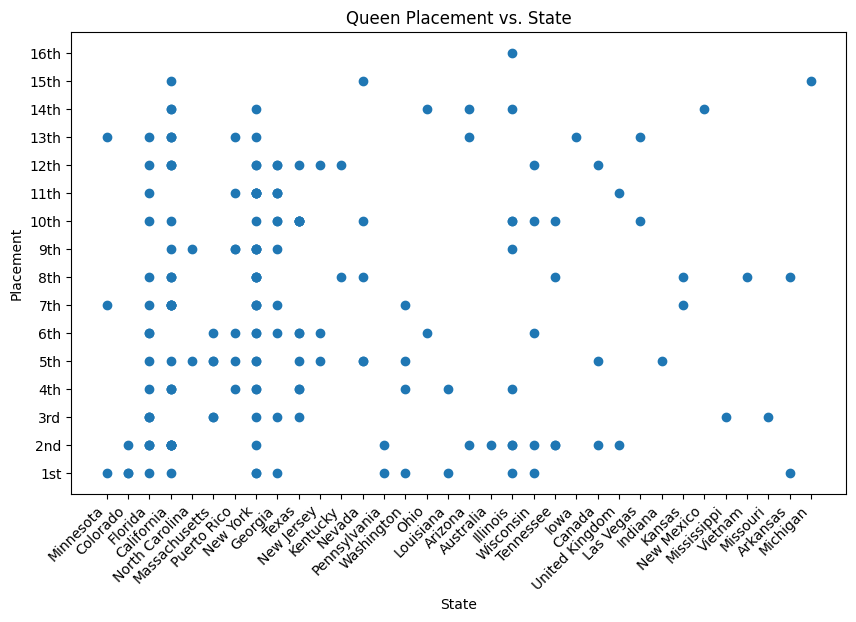

In [48]:
def load_and_preprocess_data(filename):
  df = pd.read_csv(filename)

  # Handle potential missing values 
  df['Placement'] = df['Placement'].fillna('N/A') 

  return df

def create_scatter_plot(df):
  plt.figure(figsize=(10, 6))
  plt.scatter(df['State'], df['Placement'])
  plt.xlabel("State")
  plt.ylabel("Placement")
  plt.title("Queen Placement vs. State")
  plt.xticks(rotation=45, ha='right')
  plt.show()

# Load and preprocess the data
df = load_and_preprocess_data("Queens.csv")

# Create the scatter plot
create_scatter_plot(df)

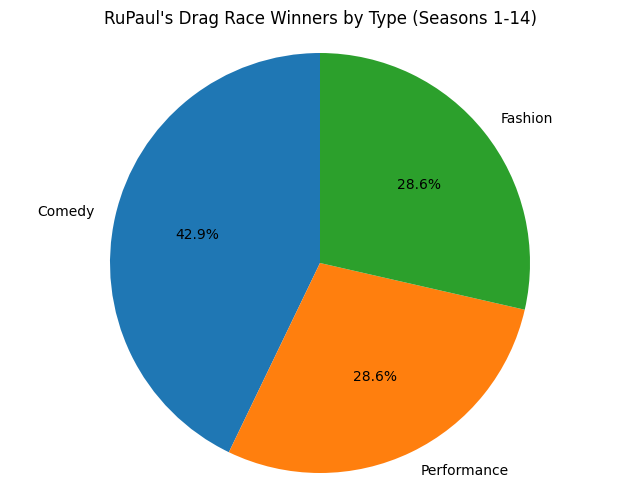

In [9]:
#sort through data for pie chart
winners = df[df['Placement'] == '1st']
winner_counts = winners['Type'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(winner_counts, labels=winner_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("RuPaul's Drag Race Winners by Type (Seasons 1-14)")
plt.axis('equal')
plt.show()

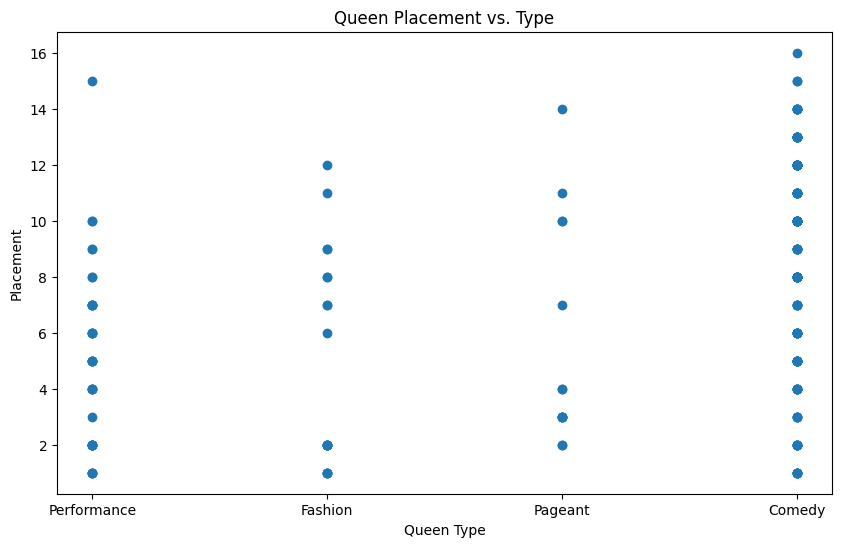

In [45]:
def load_and_preprocess_data(filename):
  df = pd.read_csv("Queens.csv")

  # Map placements to numerical values
  placement_map = {
      "1st": 1,
      "2nd": 2,
      "3rd": 3,
      "4th": 4,
      "5th": 5,
      "6th": 6,
      "7th": 7,
      "8th": 8,
      "9th": 9,
      "10th": 10,
      "11th": 11,
      "12th": 12,
      "13th": 13,
      "14th": 14,
      "15th": 15,
      "16th": 16
  }
  df['Placement_Num'] = df['Placement'].map(placement_map)

  return df

def create_scatter_plot(df):
  plt.figure(figsize=(10, 6))
  plt.scatter(df['Type'], df['Placement_Num'])
  plt.xlabel("Queen Type")
  plt.ylabel("Placement")
  plt.title("Queen Placement vs. Type")
  plt.show()

# Load and preprocess the data
df = load_and_preprocess_data("Queens.csv")

# Create the scatter plot
create_scatter_plot(df)